In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
heart_disease_data=pd.read_csv("/content/heart_disease_data.csv")

In [37]:
heart_disease_data.shape

(303, 14)

In [38]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
heart_disease_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [40]:
heart_disease_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [41]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


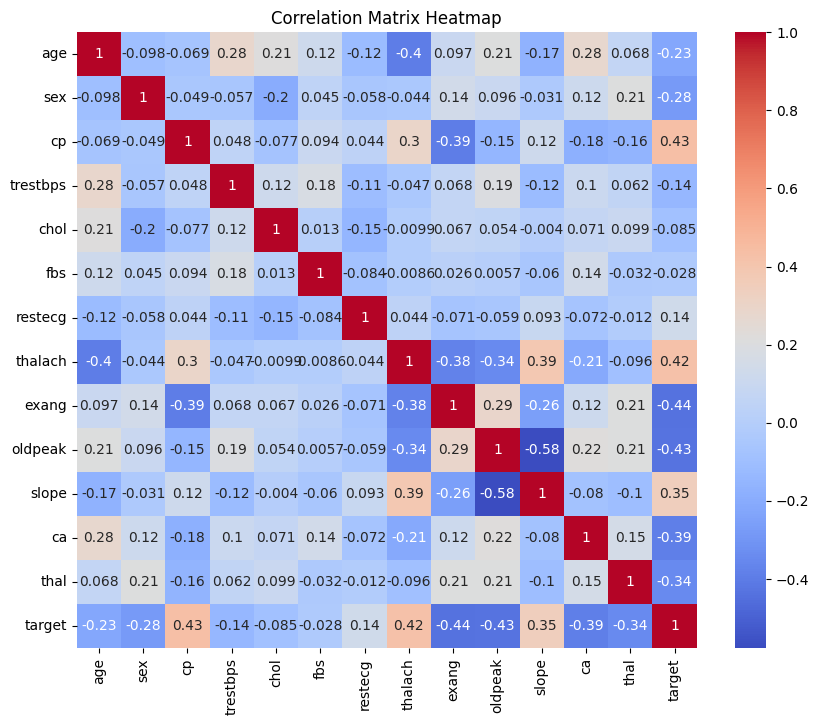

In [42]:
correlation_matrix = heart_disease_data.corr()
print(correlation_matrix['target'].sort_values(ascending=False))

# Heatmap for visualizing correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-43-9e19e5ca167b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_disease_data, palette='viridis')


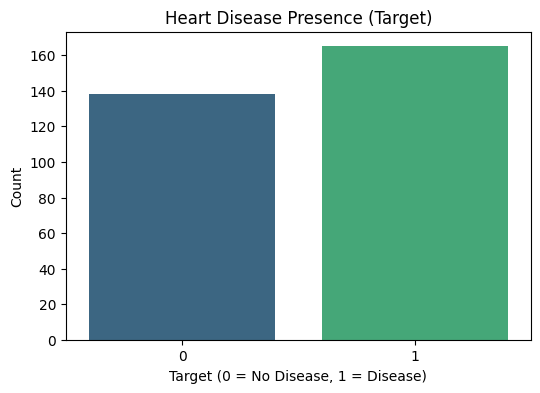

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_disease_data, palette='viridis')
plt.title('Heart Disease Presence (Target)')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

<ipython-input-44-b30a0a8f49e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=heart_disease_data, palette='Set2')


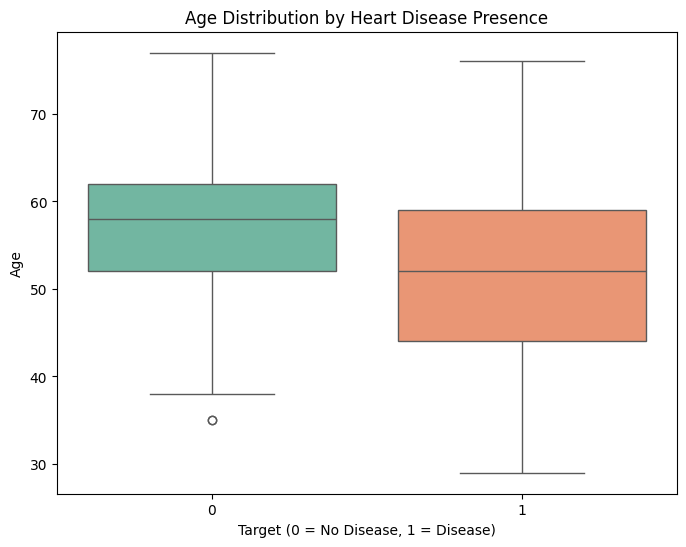

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=heart_disease_data, palette='Set2')
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Age')
plt.show()

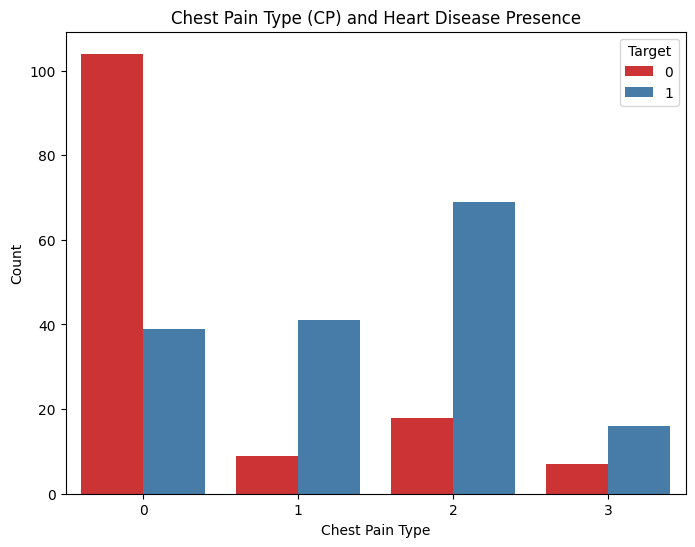

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=heart_disease_data, palette='Set1')
plt.title('Chest Pain Type (CP) and Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right')
plt.show()

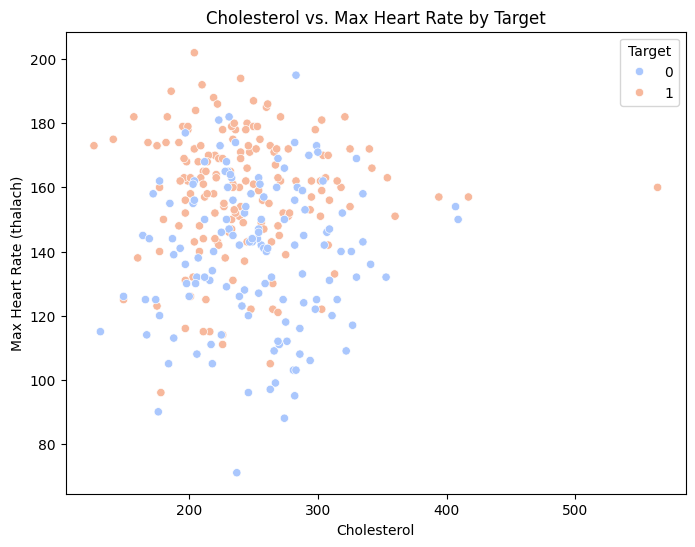

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='chol', y='thalach', hue='target', data=heart_disease_data, palette='coolwarm')
plt.title('Cholesterol vs. Max Heart Rate by Target')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate (thalach)')
plt.legend(title='Target')
plt.show()

In [47]:
heart_disease_data['target'].value_counts()

,count
target,
1,165
0,138


o => healthy

1 => have a disease

splitting features and target

In [48]:
x=heart_disease_data.drop(columns='target',axis=1)
y=heart_disease_data['target']

In [49]:
print(x,y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3
300   68    1   0       144   193    1        1      141      0      3.4      1   2     3
301   57    1   0       130   131    0        1      115      1      1.2      1   1     3
302   57  

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [51]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


train the model

In [52]:
model=LogisticRegression()

In [53]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model evaluation

In [54]:
#accuracy on training data
x_train_prediction=model.predict(x_train)
x_train_accuracy=accuracy_score(y_train,x_train_prediction)
print("the train data accuracy: ",x_train_accuracy)

the train data accuracy:  0.8512396694214877


In [55]:
#accuracy on testing data
x_test_prediction=model.predict(x_test)
x_test_accuracy=accuracy_score(y_test,x_test_prediction)
print("the test data accuracy: ",x_test_accuracy)

the test data accuracy:  0.819672131147541


In [56]:
Input_data=(63,	1	,3,	145	,233,	1	,0	,150	,0	,2.3,	0,	0,	1	)

#Changing the Input_data to a nimpy array
Input_data_as_numpy_array=np.asarray(Input_data)

#reshape the np array as we predicting for one instance
Input_data_reshaped=Input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(Input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print('the person is have the disease')
else:
  print('the person do not have the disease')


[1]
the person is have the disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
